# Questions

## Increase in surface salinity in the arctic, is there some kind of trend in obersved data? What about models?

## How well does models represent the changes in salinity, and can they be used as a good indication for the future?

## How does sea surface salinity affect the vertical ocean circulation? And is this influence impactfull?

## What can we say about the sea surface salinity in the future, and how will this affect the vertical circulation in the arctic?


In [23]:
import functions as f
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import s3fs
import cftime
import intake
import numpy as np
from joblib import Parallel, delayed

## Satellite data

In [17]:
s3 = s3fs.S3FileSystem(key="K1CQ7M1DMTLUFK182APD", secret="3JuZAQm5I03jtpijCpHOdkAsJDNLNfZxBpM15Pi0", client_kwargs=dict(endpoint_url="https://rgw.met.no"))
path='escience2022/Antoine/ESA_SMOS_Arctic_Sea_Surface_Salinity/'
model_path='escience2022/Ada/daily/'
year = 2018
index = 180
sat_files = f.read_satellite_data(num_years=10, path=path)
dat = xr.open_dataset(s3.open(sat_files[year][index])).squeeze()
dat['y'] = dat['y']*1000
dat['x'] = dat['x']*1000
sss = dat['sss']

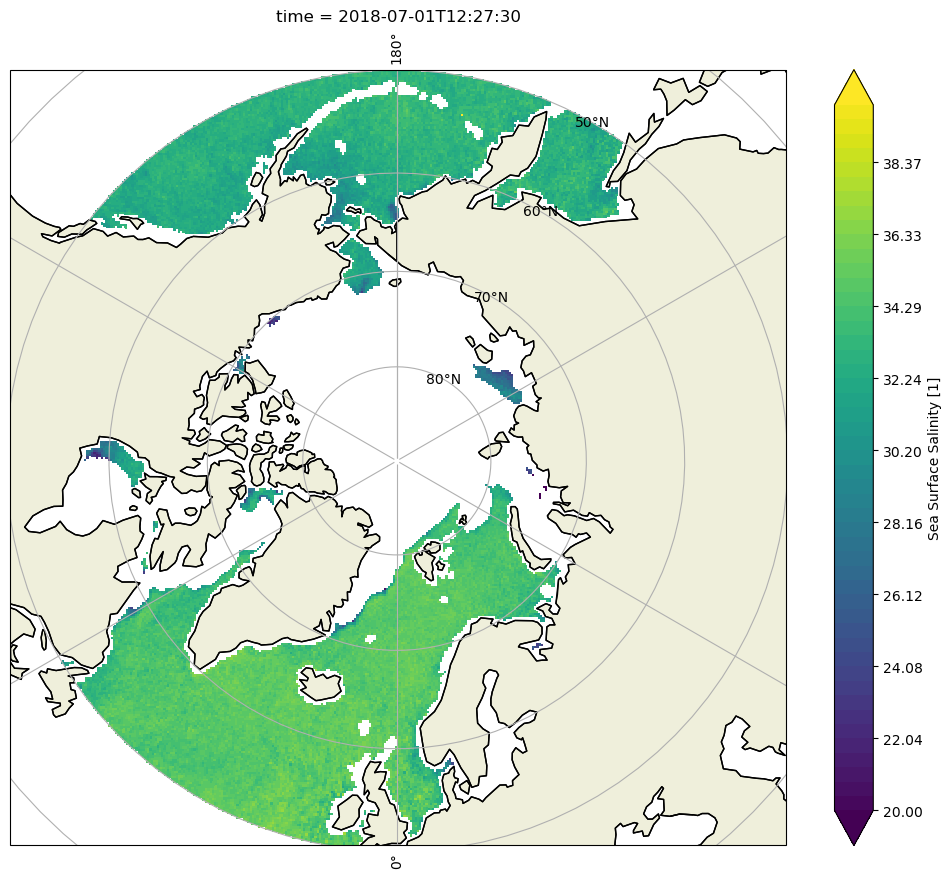

In [18]:
f.plot_sss_sat(dat['sss'], levels=50)

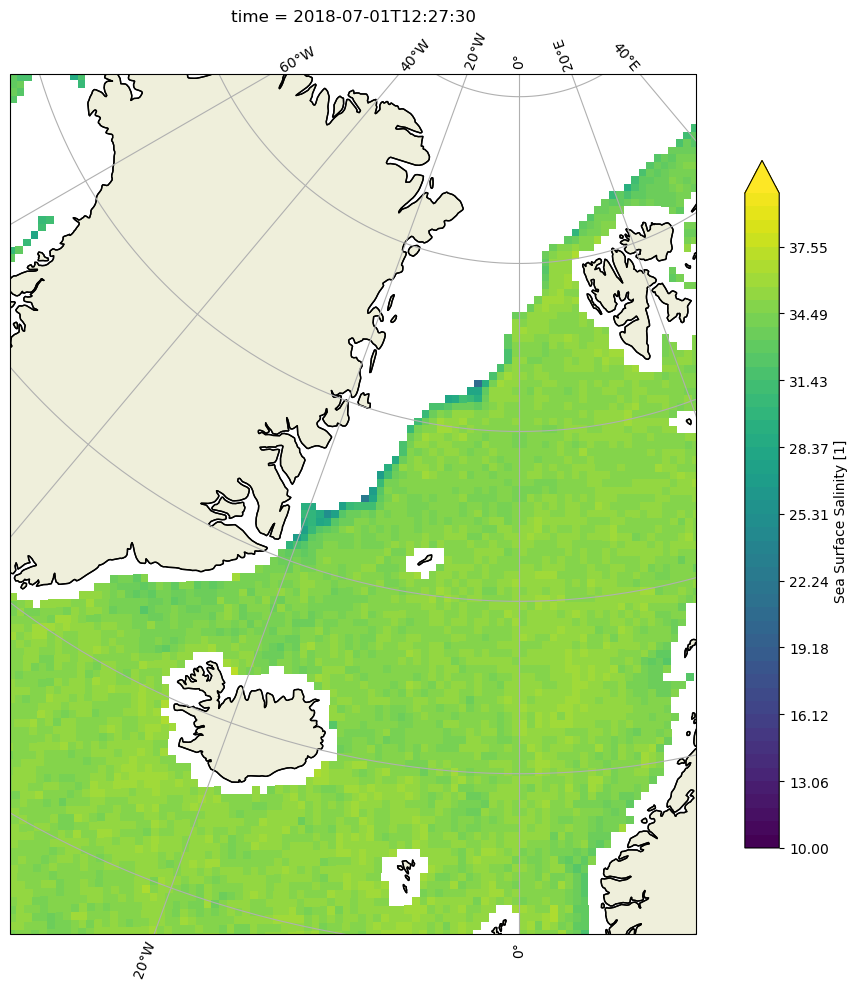

In [21]:
f.plot_sss_sat(sss, levels=50, extent=[-30,10,85,60], vmin=10, vmax=40)

In [ ]:
#xr.open_mfdataset()

In [43]:
import time

years = [2011,2012,2013,2014,2015,2016,2017,2018,2019]
start = time.time()
tmp = []
for year in years:
    tmp.append(xr.concat(Parallel(n_jobs=16)(delayed(f.create_xr)(file) for file in sat_files[year]), dim='time'))
print(time.time()-start)

451.06525921821594


In [41]:
    
sat_data = xr.concat(tmp, dim='time')#, dim='Year')
    

ValueError: must supply at least one object to concatenate

In [40]:
    sat_data['time.dayofyear']

<xarray.DataArray 'dayofyear' (Day: 731)>
array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
       171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183,
       184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196,
       197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209,
       210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222,
       223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235,
       236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248,
       249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261,
...
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
       183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195,
       196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208,
       209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,
       222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234,
       235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247,
       248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260,
       261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273,
       274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286,
       287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299,
       300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312,
       313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325,
       326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338,
       339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351,
       352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364,
       365, 366,   1])
Coordinates:
    time     (Day) datetime64[ns] 2011-01-02T21:32:30 ... 2013-01-01T12:01:30
Dimensions without coordinates: Day

In [37]:
    tmp[0]

<xarray.Dataset>
Dimensions:      (Day: 365, y: 432, x: 432)
Coordinates:
    time         (Day) datetime64[ns] 2011-01-02T21:32:30 ... 2012-01-01T11:5...
  * y            (y) float32 -5.388e+06 -5.362e+06 ... 5.362e+06 5.388e+06
  * x            (x) float32 -5.388e+06 -5.362e+06 ... 5.362e+06 5.388e+06
    lat          (y, x) float32 16.62 16.82 17.02 17.22 ... 17.02 16.82 16.62
    lon          (y, x) float32 -45.0 -44.87 -44.73 -44.6 ... 135.3 135.1 135.0
Dimensions without coordinates: Day
Data variables:
    crs          (Day) int32 -2147483647 -2147483647 ... -2147483647 -2147483647
    sss          (Day, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    sss_error    (Day, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    sss_anomaly  (Day, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    sss_flag     (Day, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
Attributes: (12/48)
    title:                     Arctic Sea Surface Salinity L3 map
    institution:               Barcelona Expert Center (BEC), ICM-CSIC, Barce...
    institution_url:           http://bec.icm.csic.es
    summary:                   This dataset contains 9-day Level-3 Arctic sea...
    comment:                   These data were produced at BEC as part of the...
    source:                    SMOS L1B version 6.21
    ...                        ...
    sensor:                    SMOS/MIRAS
    spatial_resolution:        35km at nadir
    license:                   This product is distributed under Creative Com...
    license_url:               https://creativecommons.org/licenses/by/4.0/
    copyright:                 If this data is used for publication, the foll...
    doi:                       10.20350/digitalCSIC/12620

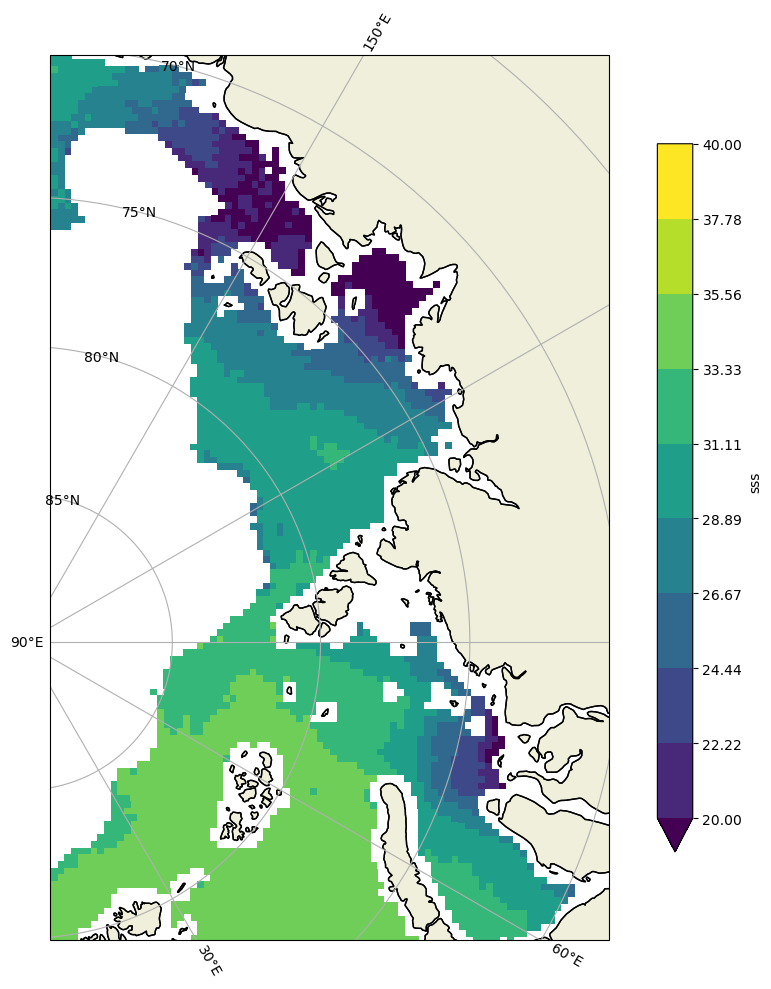

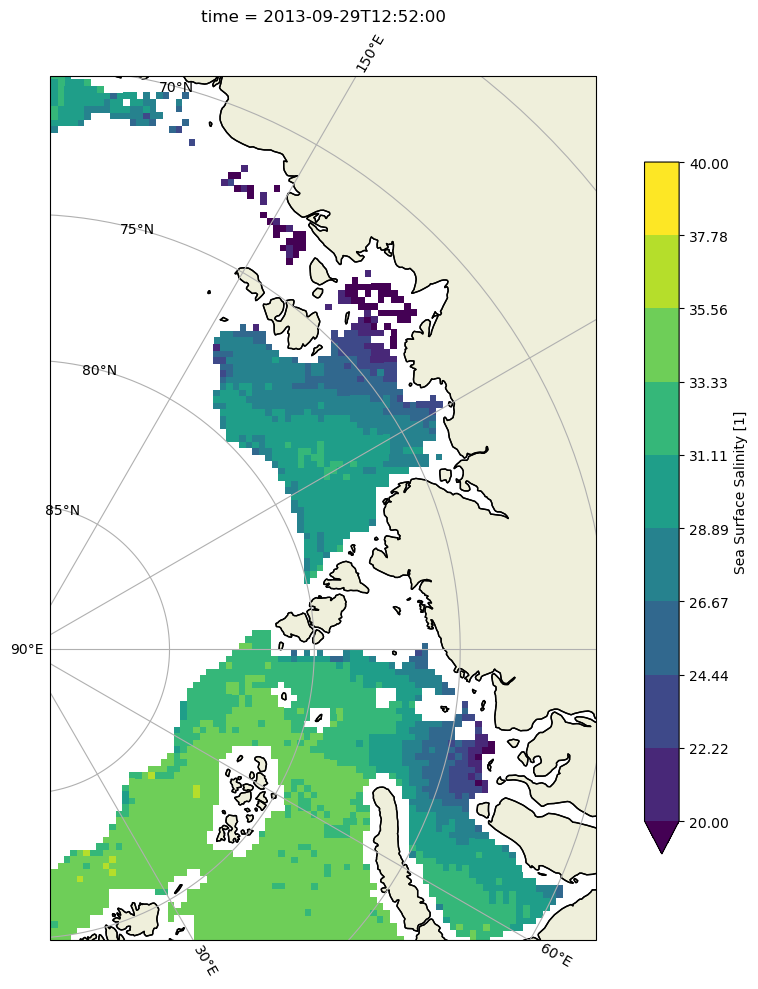

In [33]:
mlen = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

m = data['sss'][250:280].mean('time')
#monthly_mean = data['sss'][mlen[0]:mlen[1]].mean()
#monthly_mean
f.plot_sss_sat(m, extent = [60,170,85,70])
f.plot_sss_sat(data['sss'][270], extent = [60,170,85,70])

In [ ]:
model_path='escience2022/Ada/daily/chlos_Oday_NorESM2-LM_historical_r1i1p1f1_gn_18500101-18591231.nc'
dat = xr.open_dataset(s3.open(model_path))
dat

## ARGO data

In [20]:
argo_path = 'escience2022/Ada/ARGO'